In [1]:
import sys
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
from gs.gs import gs, gs2
from numpy.fft import fft, fft2, fftshift, fftfreq

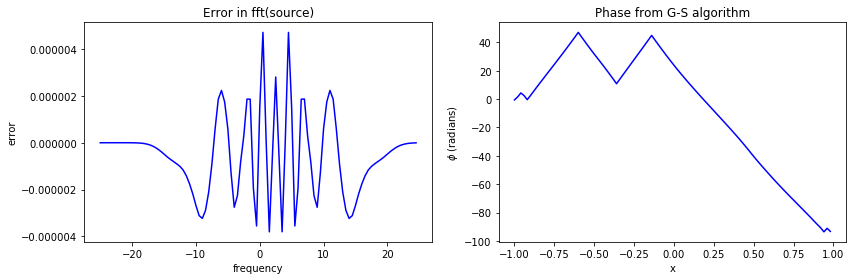

In [2]:
# First simple test, Fourier shift
N = 100
dx = 2/N
x = np.linspace(-1, 1, N, False)
xp = 0.1
sigma = 0.1
sigmaF = 1/(2*np.pi*sigma)
source = np.exp(-x**2/2/sigma**2)
target = np.exp(-(x-xp)**2/2/sigma**2)
# G-S algorithm
phi = gs(source, target)
sourceP = source * np.exp(1j*phi)
sourceF = fft(sourceP)/np.sqrt(N)
f = fftshift(fftfreq(N, dx))

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(f, target - abs(sourceF), 'b-')
plt.title('Error in fft(source)')
plt.xlabel('frequency')
plt.ylabel('error')
plt.subplot(122)
plt.plot(x, phi, 'b-')
plt.title('Phase from G-S algorithm')
plt.xlabel('x')
plt.ylabel(r'$\phi$ (radians)')
plt.tight_layout()
plt.show()
# Error should be on the order of 5e-6, phase should be linear (possibly some wrapping errors)
# Running repeatedly should change the output

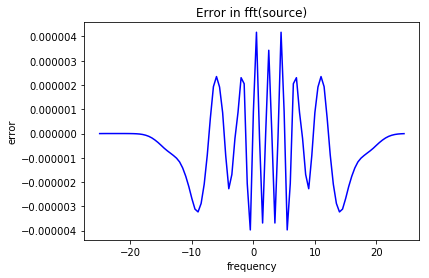

In [3]:
# Test error function
phi = gs(source, target, n=1000, err=1e-5)
sourceP = source * np.exp(1j*phi)
sourceF = fft(sourceP)/np.sqrt(N)
f = fftshift(fftfreq(N, dx))

plt.plot(f, target - abs(sourceF), 'b-')
plt.title('Error in fft(source)')
plt.xlabel('frequency')
plt.ylabel('error')
plt.show()
# Should converge without hitting the n step limit
# Running repeatedly should change the output

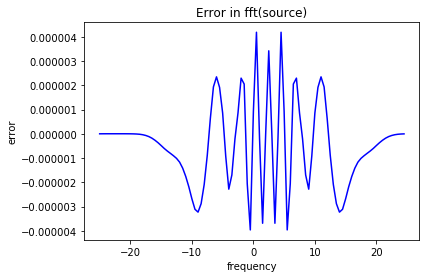

In [4]:
# Test with 0 intial phase
phi = gs(source, target, n=1000, zeroPhase=True)
sourceP = source * np.exp(1j*phi)
sourceF = fft(sourceP)/np.sqrt(N)
f = fftshift(fftfreq(N, dx))

plt.plot(f, target - abs(sourceF), 'b-')
plt.title('Error in fft(source)')
plt.xlabel('frequency')
plt.ylabel('error')
plt.show()
# Should always produce the same initial phase when run

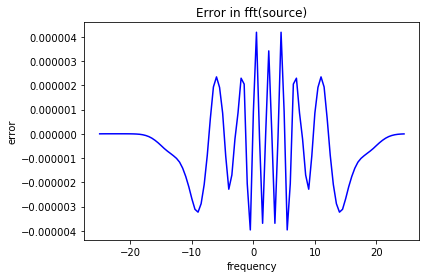

In [36]:
# Test with passed initial phase
sourceFull = source * np.exp(-1j*2*np.pi*xp*x)
phi = gs(sourceFull, target, n=1000, err=1e-6)
sourceP = source * np.exp(1j*phi)
sourceF = fft(sourceP)/np.sqrt(N)
f = fftshift(fftfreq(N, dx))

plt.plot(f, target - abs(sourceF), 'b-')
plt.title('Error in fft(source)')
plt.xlabel('frequency')
plt.ylabel('error')
plt.show()
# Should never change and shouldn't hit the max iterations

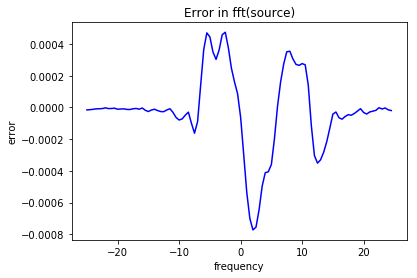

In [11]:
# Test the 2D version
N = 100
dx = 2/N
x = np.reshape(np.linspace(-1, 1, N, False), (N, 1))
y = np.linspace(-1, 1, N, False)
xp = 0.1
yp = -0.1
sigma = 0.1
sigmaF = 1/(2*np.pi*sigma)
source = np.exp(-(x**2 + y**2)/2/sigma**2)
target = np.exp(-((x-xp)**2 + (y-yp)**2)/2/sigma**2)
# G-S algorithm
phi = gs2(source, target)
sourceP = source * np.exp(1j*phi)
sourceF = fft2(sourceP)/N
f = fftshift(fftfreq(N, dx))

plt.plot(f, target[:, int(N/2)] - abs(sourceF[:, int(N/2)]), 'b-')
plt.title('Error in fft(source)')
plt.xlabel('frequency')
plt.ylabel('error')
plt.show()
# Error should be on the order of 1e-5 or 1e-4, depends on the initial random phase